# Digital Signal and Image Management
###### Assignment 2

> **Cognome**: Davoli    **Nome**: Sofia                                  \\
> **Matricola**: 813479                                                     \\


In [34]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#-- Image management
from skimage import io        #-- Input/output
from skimage import transform #-- Geometric transformations (e.g. resize)
from skimage import filters   #-- Local processing
from skimage import color     #-- Change of color space
import cv2 as cv

#-- File Management
from google.colab import drive
import tarfile
from shutil import copyfile

#-- Future Warnings
import warnings

warnings.simplefilter(action = 'ignore',
                      category = FutureWarning)

## File reading

In [35]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [92]:
#@title Lettura del File `pepe.jpg` {display-mode: "form"}

pepe = io.imread("gdrive/My Drive/pepe.jpg")

plt.rcParams['figure.figsize'] = [15,5]


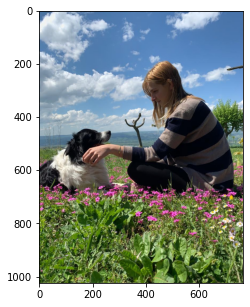

In [37]:
plt.imshow(pepe); plt.show()

In [38]:
pepe.shape

(1024, 768, 3)

# RGB color space

3 channels (RED, GREEN; BLUE)
white is obtained by the maximum value of each of the 3 channels while black is the minimum value of the 3 channels.

The clouds in the image and pepe's white hair when decomposed in the 3 channels assume the darker shade.

The pants and pepe's black hair are white (absence of value) in the d3 decomposed channels.


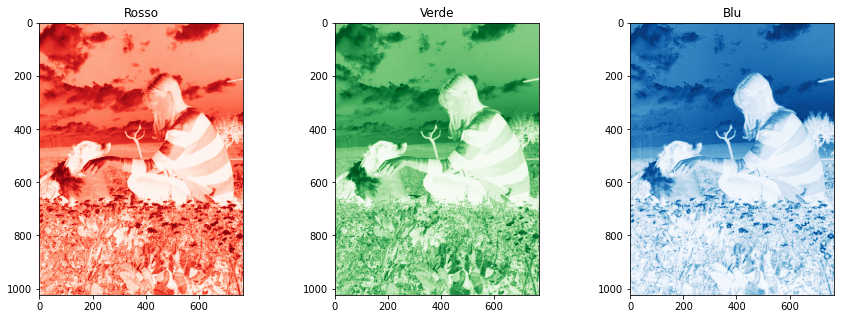

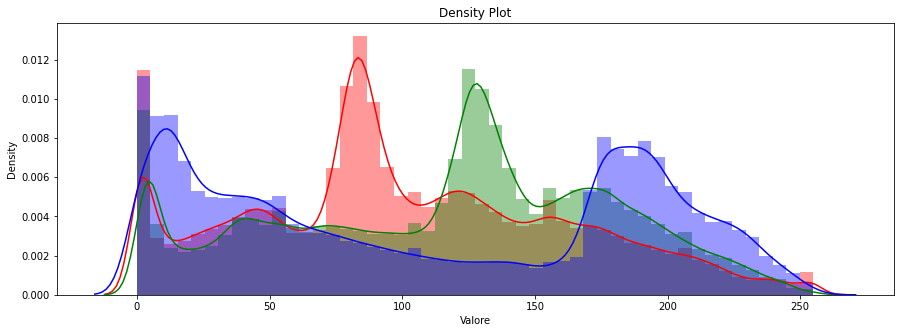

In [39]:

plt.subplot(131)
plt.imshow(pepe[:, :, 0], cmap='Reds')
plt.title('Rosso')

plt.subplot(132)
plt.imshow(pepe[:, :, 1], cmap='Greens')
plt.title('Verde')

plt.subplot(133)
plt.imshow(pepe[:, :, 2], cmap='Blues')
plt.title('Blu')
plt.show()

plt.figure()
sns.distplot(pepe[:, :, 0].ravel(),
             color = "red", label = "Red")
sns.distplot(pepe[:, :, 1].ravel(),
             color = "green", label = "Green")
sns.distplot(pepe[:, :, 2].ravel(),
             color = "blue", label = "Blue")

plt.xlabel('Valore')
plt.title('Density Plot')
plt.show()

# YCbCr color space

Here Y is the luma component of the color. Luma component is the brightness of the color. That means the light intensity of the color. The human eye is more sensitive to this component. 
In this case in Y channel all the elements of the image appear clearly.

Cb and Cr are the blue  and red component related to the chroma component. These components are less sensitive to the human eyes.

The elements of the picture in the 2 figure of Cb and Cr channels are not clear as in the Y channel.
In the Cb channel white represent high level of Blue (example: the sky) and the darker shades are yellow component.

In the Cr channels darker value stand for Green color (the grass) and white stand for red (the pink flowers appear clearly in the grass)

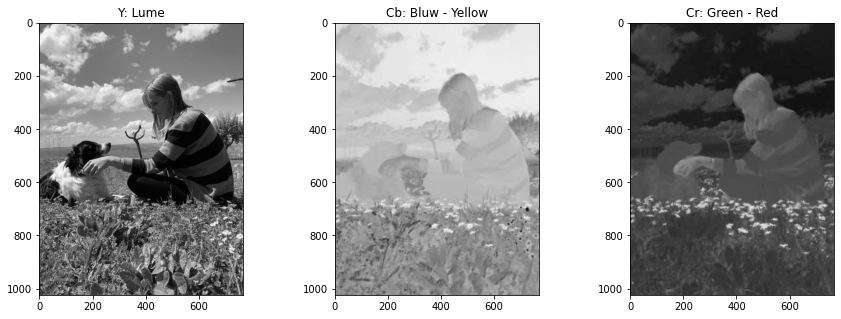

In [66]:
pepe_YCC = color.rgb2ycbcr(pepe[:, :, :])
plt.imshow(pepe_YCC.astype('uint8'))

# YCbCr
plt.subplot(131)
plt.imshow(pepe_YCC[:, :, 0], cmap = "gray")
plt.title('Y: Lume')

plt.subplot(132)
plt.imshow(pepe_YCC[:, :, 1], cmap = "gray")
plt.title('Cb: Bluw - Yellow')

plt.subplot(133)
plt.imshow(pepe_YCC[:, :, 2], cmap = "gray")
plt.title('Cr: Green - Red')
plt.show()

# Blurring

Blurring the 3 channel of 3 different sigma values aand plotting blurred channel

In [79]:
#blurring all the 3 channels with sigma=1
pepe_blurred_YCbCr = filters.gaussian(pepe_YCC,
                                    sigma = 0.7,
                                    mode = "nearest",
                                    truncate = 3.5,
                                    multichannel = True)

#blurring all the 3 channels with sigma= 1.5
pepe_blurred_YCbCr1 = filters.gaussian(pepe_YCC,
                                    sigma = 2.5,
                                    mode = "nearest",
                                    truncate = 3.5,
                                    multichannel = True)

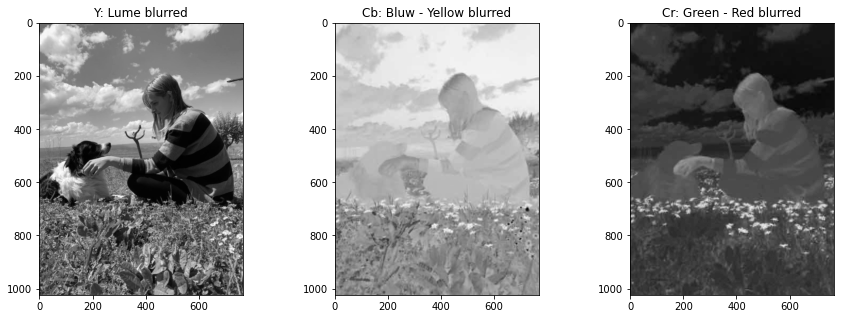

In [80]:
plt.subplot(131)
plt.imshow(pepe_blurred_YCbCr[:, :, 0], cmap = "gray")
plt.title('Y: Lume blurred')

plt.subplot(132)
plt.imshow(pepe_blurred_YCbCr[:, :, 1], cmap = "gray")
plt.title('Cb: Bluw - Yellow blurred')

plt.subplot(133)
plt.imshow(pepe_blurred_YCbCr[:, :, 2], cmap = "gray")
plt.title('Cr: Green - Red blurred')
plt.show()

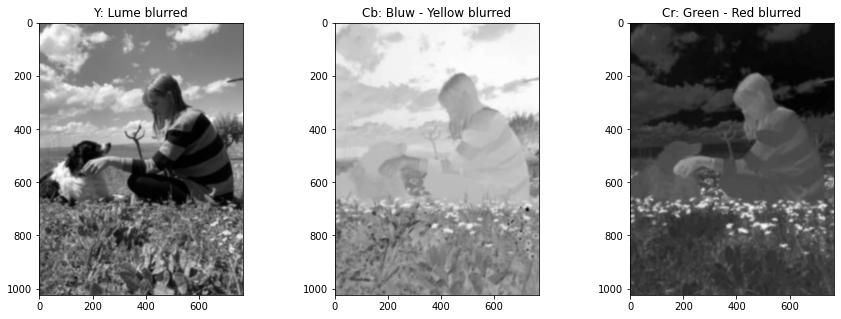

In [81]:
plt.subplot(131)
plt.imshow(pepe_blurred_YCbCr1[:, :, 0], cmap = "gray")
plt.title('Y: Lume blurred')

plt.subplot(132)
plt.imshow(pepe_blurred_YCbCr1[:, :, 1], cmap = "gray")
plt.title('Cb: Bluw - Yellow blurred')

plt.subplot(133)
plt.imshow(pepe_blurred_YCbCr1[:, :, 2], cmap = "gray")
plt.title('Cr: Green - Red blurred')
plt.show()

## Blur CbCr
Blurring of Cb and Cr channel with a gaussian filter.
It is a widely used effect in graphics software, typically to reduce image noise and reduce detail.

In this case applying blurring to Y channels or to CbCr channels causes very differents effects on the final image.

In [82]:
#only blurr CbCr
pepe_blurred_YCbCr[:,:, 0] = pepe[:,:, 0] #substituing the Y channel with the original




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show>

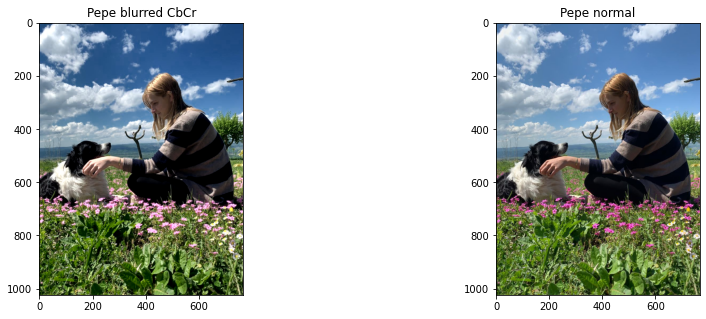

In [83]:
pepe_blurred_YCbCr = color.ycbcr2rgb(pepe_blurred_YCbCr)

plt.subplot(121)
plt.imshow(pepe_blurred_YCbCr)
plt.title('Pepe blurred CbCr')

plt.subplot(122)
plt.imshow(pepe)
plt.title('Pepe normal')

plt.show

Blurring CbCr channel have a little effect on final image.
Visible changes are in the flowers colors (which are clearer) , and in the sky color (which is darker). All the element of the image are well defined.

## Blur Y (sigma 0.7)


In [88]:
#take only blurred Y channel
pepe_YCC = color.rgb2ycbcr(pepe[:, :, :])
pepe_YCC[:,:, 0] = pepe_blurred_YCbCr[:,:, 0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show>

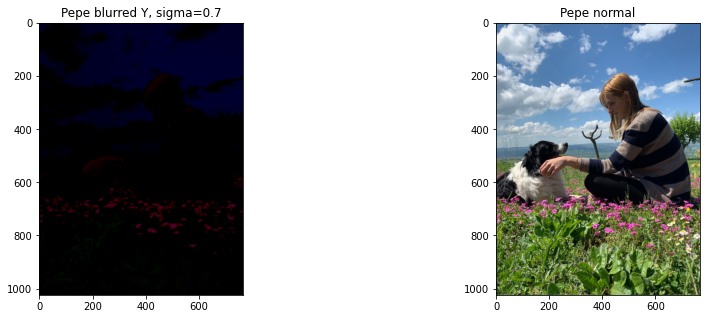

In [89]:
pepe_YCC = color.ycbcr2rgb(pepe_YCC)
plt.subplot(121)
plt.imshow(pepe_YCC)
plt.title('Pepe blurred Y, sigma=0.7')

plt.subplot(122)
plt.imshow(pepe)
plt.title('Pepe normal')

plt.show

Blurring Y channel have a disastrous effect on this image, now no element is evident. Only a darker blue is present in the upper part of the image And flowers color in the lower part.

. 

## Blur Y (sigma 2.5)

Changing the value of the Standard deviation for Gaussian kernel implies different results. 
This time elements are visible but the details are not visibles.

In [90]:
pepe_YCC = color.rgb2ycbcr(pepe[:, :, :])
pepe_YCC[:,:, 0] = pepe_blurred_YCbCr1[:,:, 0] #only blurr Y

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show>

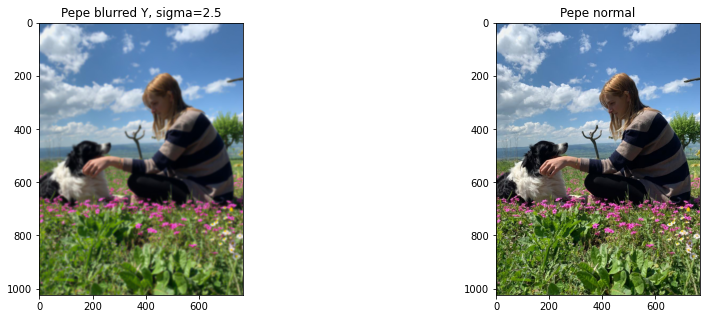

In [91]:
pepe_YCC = color.ycbcr2rgb(pepe_YCC)
plt.subplot(121)
plt.imshow(pepe_YCC)
plt.title('Pepe blurred Y, sigma=2.5')

plt.subplot(122)
plt.imshow(pepe)
plt.title('Pepe normal')

plt.show